<a href="https://colab.research.google.com/github/saranshikens/Epoch-Spring-Camp/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CLASSIFICATION MODEL**  
By - Saransh

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import folium # for plotting the data points on a map

**DATA FILTERING**  
I am from Uttarakhand, hence I shall be extracting the pincodes for which 'StateName' = "UTTARAKHAND"

In [24]:
data = pd.read_csv('clustering_data.csv')
filtered_data = data[data['StateName'] == 'UTTARAKHAND']
X = filtered_data[['Latitude', 'Longitude']].to_numpy()
X = X.astype(float)

<ipython-input-24-3b9a59a83995>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('clustering_data.csv')


**DATA VISUALIZATION**  
Plotting the latitudes and longitudes to gain a better understanding of the distribution.

In [46]:
map_uttarakhand = folium.Map(location=[30.0668, 79.0193], zoom_start=7)

for _, row in filtered_data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row.get('DistrictName', '')}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(map_uttarakhand)
map_uttarakhand

From the map, we can clearly see that the data is not 'clean'. There are some data points mislabelled as being in the state of Uttarakhand. But this does not pose a problem, as long as the mislabelled points are not very 'far' from Uttarakhand.  
There are some points near Egypt and Russia, so I will be removing them manually from our data, for better analysis.

**DATA CLEANING**  
K-Means is very sensitive to "outliers", hence I will be removing them for the sake of convenience.

First, let us plot the original data points.

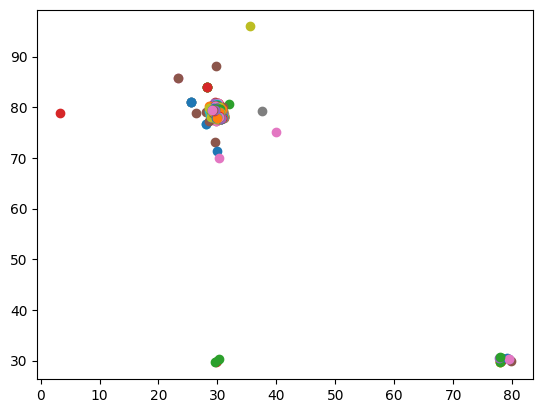

In [34]:
for i in range(len(X)):
  plt.scatter(X[i][0], X[i][1])
plt.show()

There shouldn't be any points near (5, 80), (30, 30), (40, 90) and (80, 30), according to the geographic location of Uttarakhand. I will be assuming that there is some error in the data itself, and manually remove these points from X.  
The data points can be thought of as representing cities, hence the process of removing the impurities can be facilitated by overlaying the above plot over a geographical map.

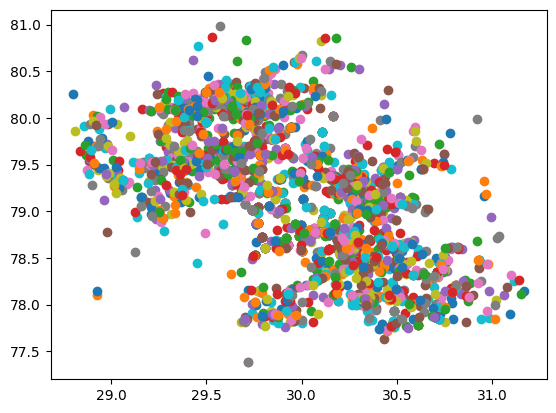

In [51]:
X = X[(X[:, 0] <= 31.5) & (X[:, 0] > 28.75) & (X[:, 1] >= 77) & (X[:, 1] <= 81)]
# If you are wondering how I got these very specific values for the bounds on latitudes and longitudes, the answer is 'trial n error'.
for i in range(len(X)):
  plt.scatter(X[i][0], X[i][1])
plt.show()

This data set is (compared to the original) more uniformily distributed (i.e. no outliers). We will implement K-Means Clustering on this instead.

**IMPLEMENTING K-MEANS CLUSTERING FROM SCRATCH**

In [22]:
class KMeans:
  def __init__(self, k, maxItr):
    self.k = k
    self.maxItr = maxItr

  def fit(self, X):
    np.random.seed(42)
    self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)] # Generate 'k' random indexes, using them as the intial centroids.

    for i in range(self.maxItr):
      self.labels  = self.assignCentroids(X) # Assign each point in X to the nearest centroid.
      newCentroids = self.computeCentroids(X) # Computing the new centroids for next iteration.
      # Logic for 'convergence' of centroids.
      # If the distance between new centroids, and original centroids becomes less than 1e-7, we will claim that the centroids have converged.
      # After this, we will stop our algorithm (i.e. if it hasn't stopped already because of 'maxItr')
      if(np.linalg.norm(self.centroids-newCentroids)<1e-7):
        break
      self.centroids = newCentroids
    return self.centroids, self.labels

  def assignCentroids(self, X):
    self.clusters = []
    for row in X:
      distances = np.linalg.norm(self.centroids - row, axis=1)
      cluster = np.argmin(distances)
      self.clusters.append(cluster)
    return self.clusters

  def computeCentroids(self, X):
    for i in range(self.k):
      cluster_points = X[self.clusters == i]
      if len(cluster_points) > 0:
        self.centroids[i] = np.mean(cluster_points, axis=0)
    return self.centroids

  def predict(self, X):
    return self.assignCentroids(X)


**APPLYING K-MEANS ON DATA**

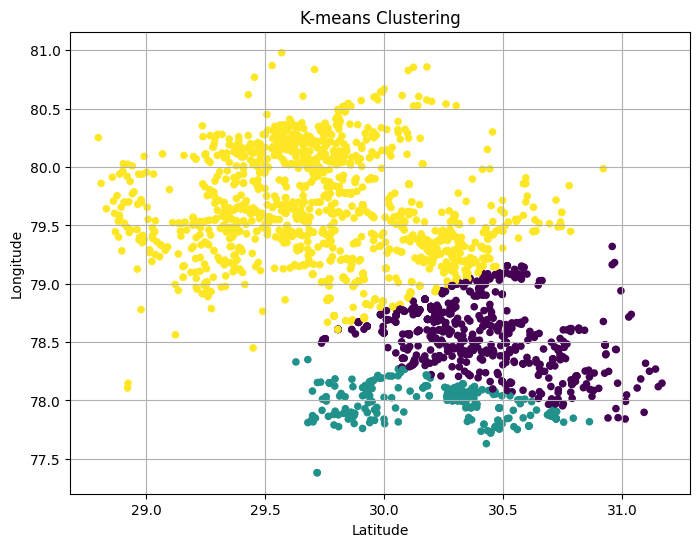

In [50]:
A = KMeans(3, 1000)
A.fit(X)
predictions = A.predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap='viridis', s=20)
plt.title('K-means Clustering')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.grid(True)
plt.show()

**INFERENCE AND INSIGHTS**  


Uttarakhand is predominantly characterized by its mountainous terrain. Culturally, it is divided into two distinct regions: Garhwal and Kumaon. Garhwal, located in the western part of the state, encompasses the higher reaches of the Himalayas and is more densely populated than Kumaon. This population concentration is largely attributed to major urban and religious centers such as Dehradun and Haridwar.

In contrast, Kumaon, situated in the eastern part of Uttarakhand, features relatively gentler terrain and is renowned for its scenic lakes—Nainital, Bhimtal, and others—which contribute to its appeal as a prominent tourist destination.

The accompanying population density map highlights this disparity effectively. The yellow-shaded region corresponds to Garhwal, clearly illustrating its denser population, while the green and purple regions represent Kumaon, which is comparatively less populated.

Garhwal’s western edge transitions into the plains of Uttar Pradesh, facilitating greater human settlement and urban expansion. Meanwhile, certain areas in both Garhwal and Kumaon appear sparsely populated. This can primarily be attributed to geographical and strategic factors—particularly the presence of rugged Himalayan terrain and proximity to the Indo-China border, which restricts dense habitation.

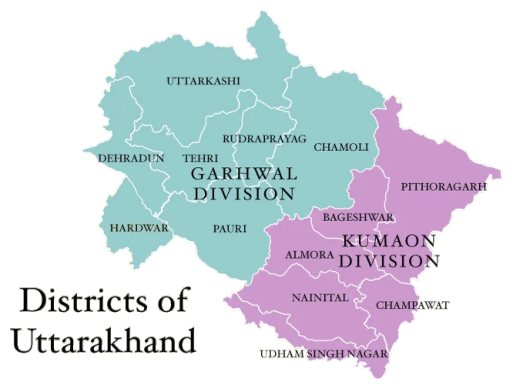

In [54]:
img = mpimg.imread('UttarakhandDistricts.webp')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()